In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Date, cast

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Inspect Tables
inspector = inspect(engine)
tables = inspector.get_table_names()
for table in tables:
    print("----------------")
    print("Table: "+table)
    columns = inspector.get_columns(table)
    for col in columns:
        print(col["name"],col["type"])

----------------
Table: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------
Table: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest = pd.read_sql(session.query(Measurement).order_by(Measurement.date.desc()).statement,session.bind)["date"][1]
print(latest)

2017-08-23


In [12]:
# Calculate the date 1 year ago from the last data point in the database
from dateutil import parser
date = parser.parse(latest)
year_ago = date - dt.timedelta(days=365)
print(year_ago)

2016-08-23 00:00:00


In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date >= year_ago).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.read_sql(session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station,Measurement.tobs).\
                 filter(Measurement.date >= year_ago).\
                 order_by(Measurement.date.asc()).statement,session.bind)
df = df.set_index(df.date)
df.head(5)

,id,date,prcp,station,tobs
date,,,,,
2016-08-24,2365,2016-08-24,0.08,USC00519397,79.0
2016-08-24,5092,2016-08-24,2.15,USC00513117,76.0
2016-08-24,7332,2016-08-24,2.28,USC00514830,80.0
2016-08-24,8826,2016-08-24,NaN,USC00517948,78.0
2016-08-24,11852,2016-08-24,1.22,USC00519523,79.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text xticklabel objects>)

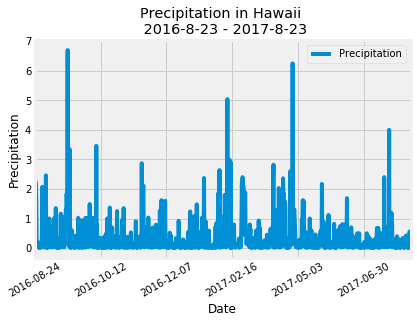

In [72]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df = df[df.prcp !=0]
precipitation = new_df.dropna(axis=0, how='any')
precipitation.plot('date','prcp')
plt.title("Precipitation in Hawaii \n 2016-8-23 - 2017-8-23")
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend(["Precipitation"])
plt.xticks(rotation=30)


![precipitation](Images/precipitation.png)

In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec = pd.read_sql(session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station,Measurement.tobs).\
                 filter(Measurement.date >= year_ago).\
                 order_by(Measurement.date.asc()).statement,session.bind)
prec = prec.set_index(df.date)
prec.rename(columns={
    "prcp":"Precipitation"
})
prec.describe()

,id,prcp,tobs
count,2223.000000,2015.000000,2223.000000
mean,10159.397211,0.176462,74.578947
std,5604.268703,0.460288,4.612232
min,2365.000000,0.000000,58.000000
25%,5287.500000,0.000000,71.000000
50%,8931.000000,0.020000,75.000000
75%,14751.500000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


![describe](Images/describe.png)

In [74]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [75]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stat = pd.read_sql(session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).\
                 order_by(Station.id.asc()).statement,session.bind)
stat = stat.rename(columns={
    "id":"Station Id"
})

prec = prec.rename(columns={
    "id":"Measurement Id"
})

merged = pd.merge(prec, stat,how='left', on='station')
grouped = merged.groupby(by="station").count()
s_count = grouped.iloc[:,[1]]
s_count = s_count.sort_values("date",ascending=False)
stations_count = pd.merge(s_count,stat,how="left",on='station')
stations_count

,station,date,Station Id,name,latitude,longitude,elevation
0,USC00519397,360,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00519281,351,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00516128,348,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,USC00513117,342,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,USC00519523,336,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00514830,304,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
6,USC00517948,182,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [86]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?
top_station = stations_count.name[0]
top_station_df = merged[merged['name'] == top_station]
print(f"Most Active Station: {stations_count.name[0]}")
print("----------------------------------------")
print(f"Lowest recorded temperature: {top_station_df.tobs.min()}")
print(f"Highest recorded temperature: {top_station_df.tobs.max()}")
print(f"Average Temperature temperature: {top_station_df.tobs.mean()}")
top_station_df

Most Active Station: WAIKIKI 717.2, HI US
----------------------------------------
Lowest recorded temperature: 60.0
Highest recorded temperature: 87.0
Average Temperature temperature: 75.19444444444444


,Measurement Id,date,prcp,station,tobs,Station Id,name,latitude,longitude,elevation
0,2365,2016-08-24,0.08,USC00519397,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,2366,2016-08-25,0.08,USC00519397,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
14,2367,2016-08-26,0.00,USC00519397,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
20,2368,2016-08-27,0.00,USC00519397,77.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
26,2369,2016-08-28,0.01,USC00519397,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
32,2370,2016-08-29,0.00,USC00519397,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
39,2371,2016-08-30,0.00,USC00519397,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
45,2372,2016-08-31,0.13,USC00519397,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
52,2373,2016-09-01,0.00,USC00519397,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
58,2374,2016-09-02,0.00,USC00519397,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [87]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_df

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
